<h1>Importing Libraries</h1>
<p>Here we'll use numpy and pandas for data analysis and matplotlib for ploting.</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1>Loading Dataset</h1>

In [15]:
load_df = pd.read_csv("preprocessed_dataset.csv")
load_df.head(2)

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,0,2,11,0,10,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2,0,0,2,16,0,11,0,0,...,0,0,1,0,0,1,0,0,0,0


<h1>Feature: 'SEVERITYCODE'</h1>
<p>We'll check the value counts of each class./p>

In [16]:
load_df['SEVERITYCODE'].value_counts()

1    132622
2     57146
Name: SEVERITYCODE, dtype: int64

<h1>Resampling</h1>
<p>As we can see, the class 1 is almost three times bigger than the class 2, so we'll downsample the 'SEVERITYCODE' feature to balance the dataset.</p>

In [19]:
from sklearn.utils import resample

df = load_df
df_prop_dam = df[df.SEVERITYCODE==1]
df_injury = df[df.SEVERITYCODE==2]

df_prop_dam_downsample = resample(df_prop_dam, 
                                  replace = False, 
                                  n_samples=df_injury['SEVERITYCODE'].count(), 
                                  random_state = 42)

df_downsample = pd.concat([df_prop_dam_downsample, df_injury])
df_downsample['SEVERITYCODE'].value_counts()

2    57146
1    57146
Name: SEVERITYCODE, dtype: int64

<h1>Loading Libraries for model evaluation</h1>
<p>We'll use SKLearn for train test splitting and model evaluation.<br>The models we'll evaluate for this study are-
<ul>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>SVM</li>
    <li>K Nearest Neighbors</li>
</ul></pi>

In [5]:
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

<h1>Splitting</h1>
<p>We'll split the dataset into train and test as 80% and 20%.</p>

In [6]:
def split(df):
    x = df.iloc[:, 1:]
    y = df.iloc[:, :1]

    x = preprocessing.StandardScaler().fit(x).transform(x)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    print ('x_train shape: {},  y_train shape: {}'.format(x_train.shape,  y_train.shape))
    print ('x_test shape: {},  y_test shape: {}'.format(x_test.shape,  y_test.shape))

    return x_train, x_test, y_train, y_test

<h1>Logistic Regression</h1>

In [7]:
def logistic_regression(df):
    x_train, x_test, y_train, y_test = split(df)
    
    lr = LogisticRegression(solver='liblinear', random_state=42)
    lr_model = lr.fit(x_train, y_train.values.ravel())
    y_predict = lr_model.predict(x_test)
    
    accuracy_score = metrics.accuracy_score(y_test, y_predict)
    r_a_score = roc_auc_score(y_test, y_predict)

    print('\naccuracy_score = ' + str('{:4.2f}'.format(accuracy_score * 100)) + '%')
    print('\nroc_auc_accuracy_score = ' + str('{:4.2f}'.format(r_a_score * 100)) + '%')
    print('\nclassification_report: \n{}'.format(metrics.classification_report(y_test, y_predict)))
    print('\nconfusion_matrix: \n{}'.format(metrics.confusion_matrix(y_test, y_predict)))

<p>We'll use the preprocessed dataset and the resampled dataset both so that after modelling, we can compare the biased and unbiased results.</p>

In [8]:
print('Preprocessed dataset:\n')
logistic_regression(load_df)
print('-'*100)
print('Downsampled dataset:\n')
logistic_regression(df_downsample)

Preprocessed dataset:

x_train shape: (151814, 54),  y_train shape: (151814, 1)
x_test shape: (37954, 54),  y_test shape: (37954, 1)

accuracy_score = 75.30%

roc_auc_accuracy_score = 62.47%

classification_report: 
              precision    recall  f1-score   support

           1       0.76      0.95      0.84     26450
           2       0.72      0.30      0.42     11504

    accuracy                           0.75     37954
   macro avg       0.74      0.62      0.63     37954
weighted avg       0.75      0.75      0.72     37954


confusion_matrix: 
[[25140  1310]
 [ 8065  3439]]
----------------------------------------------------------------------------------------------------
Downsampled dataset:

x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)

accuracy_score = 70.40%

roc_auc_accuracy_score = 70.43%

classification_report: 
              precision    recall  f1-score   support

           1       0.75      0.61    

<h1>Random Forest</h1>

In [14]:
def random_forest(df):
    x_train, x_test, y_train, y_test = split(df)
    
    clf = RandomForestClassifier()
    model = clf.fit(x_train, y_train.values.ravel())
    y_predict = model.predict(x_test)
    
    accuracy_score = metrics.accuracy_score(y_test, y_predict)
    r_a_score = roc_auc_score(y_test, y_predict)

    print('\naccuracy_score = ' + str('{:4.2f}'.format(accuracy_score * 100)) + '%')
    print('\nroc_auc_accuracy_score = ' + str('{:4.2f}'.format(r_a_score * 100)) + '%')
    print('\nclassification_report: \n{}'.format(metrics.classification_report(y_test, y_predict)))
    print('\nconfusion_matrix: \n{}'.format(metrics.confusion_matrix(y_test, y_predict)))

<p>We'll use the preprocessed dataset and the resampled dataset both so that after modelling, we can compare the biased and unbiased results.</p>

In [15]:
print('Preprocessed dataset:\n')
random_forest(load_df)
print('-'*100)
print('Downsampled dataset:\n')
random_forest(df_downsample)

Preprocessed dataset:

x_train shape: (151814, 54),  y_train shape: (151814, 1)
x_test shape: (37954, 54),  y_test shape: (37954, 1)


/home/tasnima/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



accuracy_score = 73.09%

roc_auc_accuracy_score = 64.36%

classification_report: 
              precision    recall  f1-score   support

           1       0.77      0.87      0.82     26450
           2       0.58      0.42      0.49     11504

    accuracy                           0.73     37954
   macro avg       0.68      0.64      0.65     37954
weighted avg       0.71      0.73      0.72     37954


confusion_matrix: 
[[22886  3564]
 [ 6650  4854]]
----------------------------------------------------------------------------------------------------
Downsampled dataset:

x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)


/home/tasnima/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



accuracy_score = 67.69%

roc_auc_accuracy_score = 67.68%

classification_report: 
              precision    recall  f1-score   support

           1       0.67      0.71      0.69     11474
           2       0.69      0.65      0.67     11385

    accuracy                           0.68     22859
   macro avg       0.68      0.68      0.68     22859
weighted avg       0.68      0.68      0.68     22859


confusion_matrix: 
[[8099 3375]
 [4010 7375]]


<h1>SVM</h1>

<h3>Feature set</h3>
<p>We'll create a feature set for SVM by dropping some irrelevant features from the downsampled dataset. We've selected these features by plotting the relational graph (please do check 'feature_dependency.ipynb'.</p>

In [7]:
ft_df = df_downsample[:]
ft_df.drop(['PEDCOUNT', 'PEDCYLCOUNT', 'MONTH', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 
            'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy', 'Alley', 'Head On', 
            'At Intersection (but not related to intersection)', 'Ramp Junction', 'Dry', 'Snow/Slush', 'Ice', 
            'Sand/Mud/Dirt', 'Standing Water', 'Oil', 'Dark - Street Lights On', 'Dark - No Street Lights', 
            'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Dark - Unknown Lighting'], axis=1, inplace=True)

/home/tasnima/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<h3>Feature set shape</h3>

In [8]:
ft_df.shape

(114292, 30)

<h3>SVM model</h3>

In [9]:
def svm_prediction(df):
    x_train, x_test, y_train, y_test = split(df)
    
    clf = svm.SVC()
    svm_model = clf.fit(x_train, y_train.values.ravel())
    y_predict = svm_model.predict(x_test)
    
    accuracy_score = metrics.accuracy_score(y_test, y_predict)
    r_a_score = roc_auc_score(y_test, y_predict)

    print('\naccuracy_score = ' + str('{:4.2f}'.format(accuracy_score * 100)) + '%')
    print('\nroc_auc_accuracy_score = ' + str('{:4.2f}'.format(r_a_score * 100)) + '%')
    print('\nclassification_report: \n{}'.format(metrics.classification_report(y_test, y_predict)))
    print('\nconfusion_matrix: \n{}'.format(metrics.confusion_matrix(y_test, y_predict)))

<p>We'll use the feature set for modle evaluation.</p>

In [10]:
print('SVM Features:\n')
svm_prediction(ft_df)

SVM Features:

x_train shape: (91433, 29),  y_train shape: (91433, 1)
x_test shape: (22859, 29),  y_test shape: (22859, 1)


/home/tasnima/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



accuracy_score = 70.89%

roc_auc_accuracy_score = 70.92%

classification_report: 
              precision    recall  f1-score   support

           1       0.75      0.64      0.69     11474
           2       0.68      0.78      0.73     11385

    accuracy                           0.71     22859
   macro avg       0.71      0.71      0.71     22859
weighted avg       0.71      0.71      0.71     22859


confusion_matrix: 
[[7307 4167]
 [2487 8898]]


<h1>K Nearest Neighbors (KNN)</h1>

In [7]:
def knn_prediction(df, k):
    x_train, x_test, y_train, y_test = split(df)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn.fit(x_train, y_train.values.ravel())
    y_predict = knn_model.predict(x_test)
    
    accuracy_score = metrics.accuracy_score(y_test, y_predict)
    r_a_score = roc_auc_score(y_test, y_predict)

    print('\naccuracy_score for k: {} = '.format(k) + str('{:4.2f}'.format(accuracy_score * 100)) + '%')
    print('\nroc_auc_accuracy_score for k: {} = '.format(k) + str('{:4.2f}'.format(r_a_score * 100)) + '%')
    print('\nclassification_report for k: {}: \n{}'.format(k, metrics.classification_report(y_test, y_predict)))
    print('\nconfusion_matrix for k: {}: \n{}'.format(k, metrics.confusion_matrix(y_test, y_predict)))
    
    return accuracy_score, r_a_score

<h3>Selection of k</h3>
<p>We'll fixed the range for k value from 1 to 15. After that we'll plot two graphs for 'Accuracy Vs Number of Neighbors' and 'Roc Auc Score Vs Number of Neighbors'. Thus we can select the k value for maximum accuracy score.</p>

In [8]:
k = 50
acc = []
roc_auc = []
df = df_downsample
for i in range(1, k+1):
    accuracy_score, r_a_score = knn_prediction(df, i)
    
    acc.append(accuracy_score)
    roc_auc.append(r_a_score)
    
acc = np.array(acc)
roc_auc = np.array(roc_auc)
print('Best k: {} for best accuracy: {}'.format(acc.argmax()+1, acc.max()))
print('Best k: {} for best roc auc score: {}'.format(roc_auc.argmax()+1, roc_auc.max()))

x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)

accuracy_score for k: 1 = 64.95%

roc_auc_accuracy_score for k: 1 = 64.94%

classification_report for k: 1: 
              precision    recall  f1-score   support

           1       0.65      0.65      0.65     11474
           2       0.65      0.65      0.65     11385

    accuracy                           0.65     22859
   macro avg       0.65      0.65      0.65     22859
weighted avg       0.65      0.65      0.65     22859


confusion_matrix for k: 1: 
[[7487 3987]
 [4026 7359]]
x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)

accuracy_score for k: 2 = 63.69%

roc_auc_accuracy_score for k: 2 = 63.63%

classification_report for k: 2: 
              precision    recall  f1-score   support

           1       0.60      0.82      0.69     11474
           2       0.71      0.46      0.56     11385

    accuracy     

x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)

accuracy_score for k: 15 = 69.08%

roc_auc_accuracy_score for k: 15 = 69.09%

classification_report for k: 15: 
              precision    recall  f1-score   support

           1       0.71      0.66      0.68     11474
           2       0.68      0.72      0.70     11385

    accuracy                           0.69     22859
   macro avg       0.69      0.69      0.69     22859
weighted avg       0.69      0.69      0.69     22859


confusion_matrix for k: 15: 
[[7573 3901]
 [3167 8218]]
x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)

accuracy_score for k: 16 = 68.70%

roc_auc_accuracy_score for k: 16 = 68.70%

classification_report for k: 16: 
              precision    recall  f1-score   support

           1       0.69      0.70      0.69     11474
           2       0.69      0.68      0.68     11385

    accura

x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)

accuracy_score for k: 29 = 69.64%

roc_auc_accuracy_score for k: 29 = 69.65%

classification_report for k: 29: 
              precision    recall  f1-score   support

           1       0.72      0.65      0.68     11474
           2       0.68      0.74      0.71     11385

    accuracy                           0.70     22859
   macro avg       0.70      0.70      0.70     22859
weighted avg       0.70      0.70      0.70     22859


confusion_matrix for k: 29: 
[[7439 4035]
 [2906 8479]]
x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)

accuracy_score for k: 30 = 69.48%

roc_auc_accuracy_score for k: 30 = 69.49%

classification_report for k: 30: 
              precision    recall  f1-score   support

           1       0.71      0.67      0.69     11474
           2       0.68      0.72      0.70     11385

    accura

x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)

accuracy_score for k: 43 = 69.55%

roc_auc_accuracy_score for k: 43 = 69.57%

classification_report for k: 43: 
              precision    recall  f1-score   support

           1       0.72      0.64      0.68     11474
           2       0.67      0.75      0.71     11385

    accuracy                           0.70     22859
   macro avg       0.70      0.70      0.69     22859
weighted avg       0.70      0.70      0.69     22859


confusion_matrix for k: 43: 
[[7346 4128]
 [2833 8552]]
x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)

accuracy_score for k: 44 = 69.51%

roc_auc_accuracy_score for k: 44 = 69.52%

classification_report for k: 44: 
              precision    recall  f1-score   support

           1       0.71      0.66      0.68     11474
           2       0.68      0.73      0.71     11385

    accura

<p>Saving the accuracy and roc_auc_score.</p>

In [10]:
acc = np.array(acc)
roc_auc = np.array(roc_auc)

import pickle as pkl
pkl.dump(acc, open('knn_acc.pkl', 'wb'))
pkl.dump(roc_auc, open('roc_auc.pkl', 'wb'))

<h3>Plotting 'Accuracy and Roc Auc Score Vs Number of Neighbors'</h3>

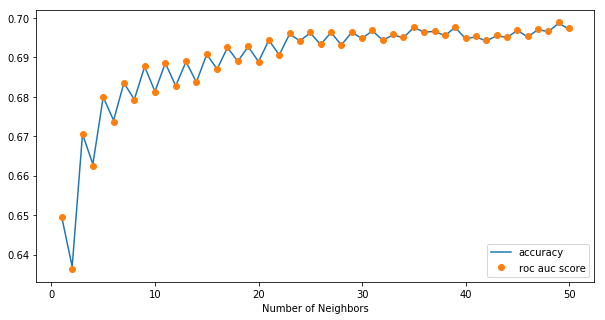

In [26]:
plt.figure(figsize=(10, 5))

plt.plot(range(1, k+1), acc)
# plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')

plt.plot(range(1, k+1), roc_auc, 'o')
# plt.ylabel('Roc Auc Score')
plt.xlabel('Number of Neighbors')

plt.legend(["accuracy", "roc auc score"], loc ="lower right")
plt.savefig('knn.png')
plt.show()

In [4]:
col = []
for i in load_df.columns:
    col.append(i)
ft = "; ".join([str(elem) for elem in col])
ft

'SEVERITYCODE; PERSONCOUNT; PEDCOUNT; PEDCYLCOUNT; VEHCOUNT; SDOT_COLCODE; UNDERINFL; ST_COLCODE; SEGLANEKEY; CROSSWALKKEY; HITPARKEDCAR; YEAR; MONTH; DAY; Alley; Block; Intersection; Angles; Cycles; Head On; Left Turn; Parked Car; Pedestrian; Rear Ended; Right Turn; Sideswipe; At Intersection (but not related to intersection); At Intersection (intersection related); Driveway Junction; Mid-Block (but intersection related); Mid-Block (not related to intersection); Ramp Junction; Blowing Sand/Dirt; Clear; Fog/Smog/Smoke; Overcast; Partly Cloudy; Raining; Severe Crosswind; Sleet/Hail/Freezing Rain; Snowing; Dry; Ice; Oil; Sand/Mud/Dirt; Snow/Slush; Standing Water; Wet; Dark - No Street Lights; Dark - Street Lights Off; Dark - Street Lights On; Dark - Unknown Lighting; Dawn; Daylight; Dusk'

PERSONCOUNT; PEDCOUNT; PEDCYLCOUNT; VEHCOUNT; SDOT_COLCODE; UNDERINFL; ST_COLCODE; SEGLANEKEY; CROSSWALKKEY; 
HITPARKEDCAR; INCDATE; ADDRTYPE; COLLISIONTYPE; JUNCTIONTYPE; WEATHER; ROADCOND; LIGHTCOND

In [22]:
df = load_df
for column in df_downsample:
    print(column, df_downsample[column].isnull().sum())

SEVERITYCODE 0
PERSONCOUNT 0
PEDCOUNT 0
PEDCYLCOUNT 0
VEHCOUNT 0
SDOT_COLCODE 0
UNDERINFL 0
ST_COLCODE 0
SEGLANEKEY 0
CROSSWALKKEY 0
HITPARKEDCAR 0
YEAR 0
MONTH 0
DAY 0
Alley 0
Block 0
Intersection 0
Angles 0
Cycles 0
Head On 0
Left Turn 0
Parked Car 0
Pedestrian 0
Rear Ended 0
Right Turn 0
Sideswipe 0
At Intersection (but not related to intersection) 0
At Intersection (intersection related) 0
Driveway Junction 0
Mid-Block (but intersection related) 0
Mid-Block (not related to intersection) 0
Ramp Junction 0
Blowing Sand/Dirt 0
Clear 0
Fog/Smog/Smoke 0
Overcast 0
Partly Cloudy 0
Raining 0
Severe Crosswind 0
Sleet/Hail/Freezing Rain 0
Snowing 0
Dry 0
Ice 0
Oil 0
Sand/Mud/Dirt 0
Snow/Slush 0
Standing Water 0
Wet 0
Dark - No Street Lights 0
Dark - Street Lights Off 0
Dark - Street Lights On 0
Dark - Unknown Lighting 0
Dawn 0
Daylight 0
Dusk 0


In [44]:
d = {'a': [1, 2], 'b': [1, None]}
raw_df = pd.DataFrame(data=d)
# raw_df = raw_df.dropna()
pd.get_dummies(raw_df['b'])

,1.0
0,1
1,0


In [1]:
import pandas as pd
import sklearn.utils as skutils
df = pd.read_csv('Data-Collisions.csv')
df.replace({'UNDERINFL': {'0':'N', '1':'Y'}}, inplace=True)
df_prop_dam = df[df.SEVERITYCODE==1]
df_injury = df[df.SEVERITYCODE==2]

df_prop_dam_downsample = skutils.resample(df_prop_dam, 
                                         replace = False, 
                                         n_samples=df_injury['SEVERITYCODE'].count(), 
                                         random_state = 42)

df_downsample = pd.concat([df_prop_dam_downsample, df_injury])
df_downsample['SEVERITYCODE'].value_counts()
for column in df_downsample:
    if df_downsample[column].isnull().sum() > 0:
        df_downsample[column].fillna(df_downsample[column].mode()[0], inplace=True)
df_downsample.isnull().sum()
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
def split_data(dataset, columns_for_one_hot):
    X = dataset.iloc[:, :-1]
    Y = dataset.iloc[:, -1:]
    X = pd.get_dummies(X, columns=columns_for_one_hot, drop_first=True)
    print(X.head())
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    print ('Train set:', X_train.shape,  y_train.shape)
    print ('Test set:', X_test.shape,  y_test.shape)
    return X_train, X_test, y_train, y_test
set_3 = ['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 
         'UNDERINFL', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 
         'INCDATE', 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 
         'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE']

/home/tasnima/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def datetime(df):
    df['INCDATE'] = df['INCDATE'].str[:10]
    df[['YEAR', 'MONTH', 'DAY']] = df['INCDATE'].str.split('/', expand=True)
datetime(df)
df.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,YEAR,MONTH,DAY
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,10,Entering at angle,0,0,N,2013,03,27
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2006,12,20


In [12]:
new_df = df[set_3]
print(len(new_df.columns))
encoding_set = ['UNDERINFL', 'HITPARKEDCAR', 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
x = pd.get_dummies(new_df, columns=encoding_set, drop_first=True)
len(x.columns)

18


55

In [12]:
from sklearn.linear_model import LogisticRegression

def train_logistic_regression(X_train, X_test, y_train, y_test, solver='liblinear'):
    lr_classifier = LogisticRegression(solver=solver, random_state=42)
    
    lr_classifier.fit(X_train, y_train)
    
    y_pred = lr_classifier.predict(X_test)
    score = lr_classifier.score(X_test, y_test)
    roc_score = roc_auc_score(y_test, y_pred)

    print(f'Score: {round(score, 4)}')
    print(f'ROC AUC Score: {round(roc_score, 4)}')

    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_pred))

    print('\nClassification Report')
    print(classification_report(y_test, y_pred))

#### Data: Without sampling, Feature Set: Set 3, Solver= liblinear

#### Data: Downsampled, Feature Set: Set 3, Solver= liblinear

In [13]:
X_train, X_test, y_train, y_test = split_data(df_downsample[set_3], set_3[:-1])

train_logistic_regression(X_train, X_test, y_train, y_test)

        PERSONCOUNT_1  PERSONCOUNT_2  PERSONCOUNT_3  PERSONCOUNT_4  \
8105                0              1              0              0   
76753               0              1              0              0   
113125              0              1              0              0   
21423               0              1              0              0   
24355               0              1              0              0   

        PERSONCOUNT_5  PERSONCOUNT_6  PERSONCOUNT_7  PERSONCOUNT_8  \
8105                0              0              0              0   
76753               0              0              0              0   
113125              0              0              0              0   
21423               0              0              0              0   
24355               0              0              0              0   

        PERSONCOUNT_9  PERSONCOUNT_10  ...  ROADCOND_Unknown  ROADCOND_Wet  \
8105                0               0  ...                 0             0   
76

/home/tasnima/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score: 0.704
ROC AUC Score: 0.7036

Confusion Matrix
[[7695 3817]
 [3072 8692]]

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.67      0.69     11512
           2       0.69      0.74      0.72     11764

    accuracy                           0.70     23276
   macro avg       0.70      0.70      0.70     23276
weighted avg       0.70      0.70      0.70     23276



In [14]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, X_test, y_train, y_test):
    rf_classifier = RandomForestClassifier()
    
    rf_classifier.fit(X_train, y_train)
    
    y_pred = rf_classifier.predict(X_test)
    score = rf_classifier.score(X_test, y_test)
    roc_score = roc_auc_score(y_test, y_pred)

    print(f'Score: {round(score, 4)}')
    print(f'ROC AUC Score: {round(roc_score, 4)}')

    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_pred))

    print('\nClassification Report')
    print(classification_report(y_test, y_pred))

#### Data: Downsampled, Feature Set: Set 3

In [15]:
X_train, X_test, y_train, y_test = split_data(df_downsample[set_3], set_3[:-1])

train_random_forest(X_train, X_test, y_train, y_test)

        PERSONCOUNT_1  PERSONCOUNT_2  PERSONCOUNT_3  PERSONCOUNT_4  \
8105                0              1              0              0   
76753               0              1              0              0   
113125              0              1              0              0   
21423               0              1              0              0   
24355               0              1              0              0   

        PERSONCOUNT_5  PERSONCOUNT_6  PERSONCOUNT_7  PERSONCOUNT_8  \
8105                0              0              0              0   
76753               0              0              0              0   
113125              0              0              0              0   
21423               0              0              0              0   
24355               0              0              0              0   

        PERSONCOUNT_9  PERSONCOUNT_10  ...  ROADCOND_Unknown  ROADCOND_Wet  \
8105                0               0  ...                 0             0   
76

/home/tasnima/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tasnima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score: 0.6987
ROC AUC Score: 0.6983

Confusion Matrix
[[7640 3872]
 [3141 8623]]

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.66      0.69     11512
           2       0.69      0.73      0.71     11764

    accuracy                           0.70     23276
   macro avg       0.70      0.70      0.70     23276
weighted avg       0.70      0.70      0.70     23276



In [2]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn(X_train, X_test, y_train, y_test, n_neighbor=1):
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbor)
    print(n_neighbor)
    
    knn_classifier.fit(X_train, y_train.values.ravel())
    print('hi2')
    
    y_pred = knn_classifier.predict(X_test)
    score = knn_classifier.score(X_test, y_test)
    roc_score = roc_auc_score(y_test, y_pred)

    print(f'Score: {round(score, 4)}')
    print(f'ROC AUC Score: {round(roc_score, 4)}')

    print('\nConfusion Matrix')
    print(confusion_matrix(y_test, y_pred))

    print('\nClassification Report')
    print(classification_report(y_test, y_pred))
    
    return score, roc_score

#### K selection

In [5]:
def k_selection(k_max=50):
    acc = []
    roc_auc = []
    for i in range(1, k_max+1):
        X_train, X_test, y_train, y_test = split_data(df_downsample[set_3], set_3[:-1])
        accuracy_score, roc_auc_score = train_knn(X_train, X_test, y_train, y_test, n_neighbor=i)

        acc.append(accuracy_score)
        roc_auc.append(roc_auc_score)

    acc = np.array(acc)
    roc_auc = np.array(roc_auc)
    print('Best k: {} for best accuracy: {}'.format(acc.argmax()+1, acc.max()))
    print('Best k: {} for best roc auc score: {}'.format(roc_auc.argmax()+1, roc_auc.max()))
    
    # Plotting 'Accuracy and Roc Auc Score Vs Number of Neighbors'
    
    plt.figure(figsize=(10, 5))  
    plt.plot(range(1, k+1), acc)
    plt.plot(range(1, k+1), roc_auc, 'o')
    plt.xlabel('Number of Neighbors')
    plt.legend(["accuracy", "roc auc score"], loc ="lower right")
    plt.show()
    
    return roc_auc.argmax()+1

#### Data: Downsampled, Feature Set: Set 3, n_neighbors=best_k

In [ ]:
best_k = k_selection(k_max=2)

X_train, X_test, y_train, y_test = split_data(df_downsample[set_3], set_3[:-1])

train_knn(X_train, X_test, y_train, n_neighbors=best_k)

        PERSONCOUNT_1  PERSONCOUNT_2  PERSONCOUNT_3  PERSONCOUNT_4  \
8105                0              1              0              0   
76753               0              1              0              0   
113125              0              1              0              0   
21423               0              1              0              0   
24355               0              1              0              0   

        PERSONCOUNT_5  PERSONCOUNT_6  PERSONCOUNT_7  PERSONCOUNT_8  \
8105                0              0              0              0   
76753               0              0              0              0   
113125              0              0              0              0   
21423               0              0              0              0   
24355               0              0              0              0   

        PERSONCOUNT_9  PERSONCOUNT_10  ...  ROADCOND_Unknown  ROADCOND_Wet  \
8105                0               0  ...                 0             0   
76